# AN OVERVIEW OF THE NUMPY.RANDOM PACKAGE IN PYTHON

<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a detail overview of the *numpy.random* package in python. It is explained how to use the package, but it also includes a detailed explanations of simple random data, permutations and some of the distributions provided for in the package. The aim of this notebook is to simplify the mentioned module explanation given on the [Official NumPy Manual website](https://numpy.org/doc/stable/reference/random/index.html).

### CONTENTS
***
- [NUMPY](#NUMPY)
    - [INSTALLATION](#INSTALLATION)
    - [IMPORT](#IMPORT)
- [NUMPY.RANDOM](#NUMPY.RANDOM)
    - [SIMPLE RANDOM DATA](#SIMPLE_RANDOM_DATA)
        - [integers](#integers)
        - [random](#random)
        - [choice](#choice)
        - [bytes](#bytes)
    - [PERMUTATIONS](#PERMUTATIONS)
        - [shuffle](#shuffle)
        - [permutation](#permutation)
        - [permuted](#permuted)
    - [DISTRIBUTIONS](#DISTRIBUTIONS)
        - [1](#1)
        - [2](#2)
        - [3](#3)
        - [4](#4)
        - [5](#5)
    - [SEEDS](#SEEDS)
- [CONCLUSION](#CONCLUSION)
- [REFERENCES](#REFERENCES)


## NUMPY
<hr style="border:2px solid gray"> </hr>

NumPy stands for Numerical Python and it is a core scientific computing library in Python. [1]. It is a provision for huge, multi-dimensional arrays and matrices, alongside an extra-large collection of high-level mathematical functions to work on these arrays.[2] It was created in 2005 by Travis Oliphant. It is an open source project, and the source code for NumPy is located at this github repository https://github.com/numpy/numpy. [3] 

### INSTALLATION
***
There are multiple ways to have *NumPy* library installed on your system, but the easiest way is to use a python distribution that already has NumPy installed - e.g. Anaconda. (https://docs.anaconda.com/anaconda/install/index.html)

### IMPORT
***
Numpy library is imported same as any other python library, using *import* command at the start of the program. Numpy is usually imported using *np* alias, which is used later in the program when reffering to the package.

In [1]:
import numpy as np

## NUMPY.RANDOM
<hr style="border:2px solid gray"> </hr>

The *random* is a module present in the NumPy library. This module contains the functions which are used for generating random numbers. [4] Random number does not mean a different number every time. Random means something that can not be predicted logically. [6] *Random* module is based on pseudo-random number generation that means it is a mathematical way that generates a sequence of nearly random numbers. It is a combination of a bit generator and a generator. In Python, the random values are produced by the generator and originate in a Bit generator.[5]

```
numpy.random.default_rng()
```
Construct a new Generator with the default BitGenerator

In [2]:
import matplotlib.pyplot as plt

In [3]:
rng = np.random.default_rng()

### SIMPLE RANDOM DATA <a id='SIMPLE_RANDOM_DATA'></a>
***
#### [**integers**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) (low, high=None, size=None, dtype=np.int64, endpoint=False) <a id='integers'></a>

Returns random integers in the specified range. ***low*** refers to the start of the range and it's inclusive. ***high*** is the end of the range and is by the default exclusive (end of range = *high* - 1). To inlcude *high* in the range, ***endpoint*** (*False* by default) has to be set up as *True*. If *high* is not specified then *low* is used as the end of the range. ***size*** defines the shape of the output and it can be one or multi-dimensional. ***dtype*** defines the dtype of the output, and it is *np.int64* by default. *Integers* returns radnom integers in "discrete uniform" distribution. A discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. [7]

<br>

Image 1. Array shape
<center><img src="https://i.stack.imgur.com/NWTQH.png" width="500"/></center>

##### EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS 10 - 1000000 (exclusive)

Integers: [70 60 29 ... 57 70 76] 



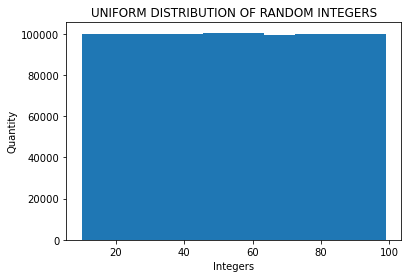

In [4]:
x_int = (rng.integers(10, 100, size=1000000))
print ("Integers:", x_int, "\n")
plt.title("UNIFORM DISTRIBUTION OF RANDOM INTEGERS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist(x_int)
plt.show()

***

RANDOM INTEGERS 0 - 5 (exlusive)

Integers: [3 3 2 4 2 2 1 0 2 0] 



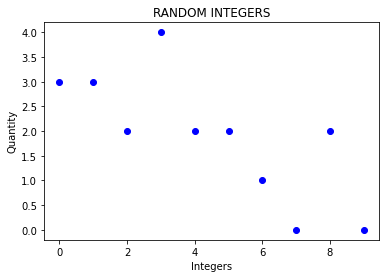

In [5]:
x1_int = (rng.integers(5, size=10))
print ("Integers:", x1_int, "\n")
plt.title("RANDOM INTEGERS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.plot (x1_int, "bo")
plt.show()

***

RANDOM INTEGERS 0 TO 5 (inclusive)

Integers: [5 3 0 2 2 4 2 2 1 1 1 3 2 4 5 5 1 5 5 5 0 3 4 0 4 3 5 0 5 0 4 0 0 2 3 2 3
 4 0 2 2 4 2 4 0 1 5 4 1 0] 



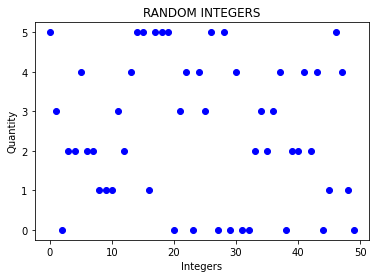

In [6]:
x2_int = (rng.integers(5, size=50, endpoint = True))
print("Integers:", x2_int, "\n")
plt.title("RANDOM INTEGERS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.plot (x2_int, "bo")
plt.show()

***

RANDOM INTEGERS 0 - 5 (exclusive) - 2D ARRAY

2D Array:
 [[2 1 4 1 1 3 4 4 0 0]
 [2 0 2 2 2 1 2 0 3 3]
 [1 0 0 2 0 1 1 1 0 2]
 [3 3 1 1 1 0 0 0 2 1]
 [4 0 3 4 3 2 3 1 2 0]
 [4 3 4 0 2 0 4 1 2 4]
 [4 1 2 3 1 2 2 1 0 2]
 [3 1 3 2 3 4 1 2 2 1]
 [1 4 3 1 4 2 4 1 0 4]
 [3 2 2 3 0 3 3 0 1 0]] 



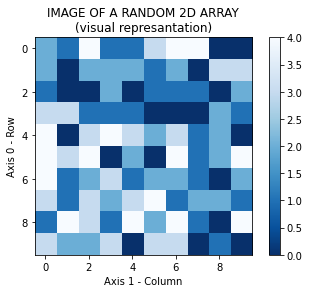

In [7]:
x3_int = (rng.integers(5, size=(10, 10)))
print ("2D Array:\n", x3_int, "\n")
plt.title("IMAGE OF A RANDOM 2D ARRAY\n(visual represantation)")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
plt.imshow (x3_int)
color_map = plt.imshow(x3_int)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

RANDOM INTEGERS 0 - 10 (exclusive) - 3D ARRAY

3D Array:
x =
 [[9 9 8 9 5]
 [6 9 0 1 1]
 [1 7 0 6 2]
 [6 3 7 4 4]
 [7 2 5 1 3]]
y =
 [[8 1 1 1 3]
 [0 2 4 9 1]
 [6 9 7 5 1]
 [2 4 1 4 9]
 [3 2 7 1 6]]
z =
 [[2 1 2 4 1]
 [8 8 1 1 5]
 [4 8 2 7 4]
 [0 6 6 7 7]
 [3 9 6 6 3]]


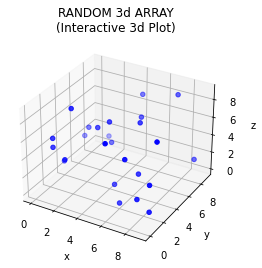

In [8]:
# %matplotlib widget
# %matplotlib inline

x4_int, y4_int, z4_int = (rng.integers(10, size=(3,5,5)))
print ("3D Array:")
print ("x =\n", x4_int)
print ("y =\n", y4_int)
print ("z =\n", z4_int)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title("RANDOM 3d ARRAY\n(Interactive 3d Plot)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter (x4_int, y4_int, z4_int, c= 'blue')
plt.show()

# %matplotlib qt

***

ARRAY WITH THREE DIFFERENT *high* VALUES

In [9]:
rng.integers(1, [10, 50, 100])

array([ 6, 37, 17], dtype=int64)

***

ARRAY WITH THREE DIFFERENT *low* VALUES

In [10]:
rng.integers([1, 50, 90], 100)

array([88, 70, 91], dtype=int64)

***

#### [**random**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)(size=None, dtype=np.float64, out=None) <a id='random'></a>

Returns random floats in the interval higher or equal to 0.0 and less then 1.0. This interval is called half-open interval, where one of the endpoints are inclusive. ***size*** defines the output shape, which, if not specified, is none - single value is returned. ***dtype*** defines the dtype of the output and is *np.float64* by the default. Only *float64* and *float32* are supported. ***out*** ??
*return* module can also be used for custom half-open intervals, e.g. if we want the output of a radnom float between a and b, we can do the following:
> (b - a) * random() + a

The outputs are from the “continuous uniform” distribution. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values.[7]

##### EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS FLOATS IN HALF OPEN INTERVAL (0,1]

Floats: [0.67879953 0.09065841 0.66263094 ... 0.43812061 0.4361729  0.82394455] 



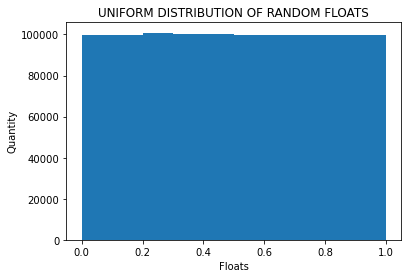

In [11]:
x_rand = (rng.random(1000000))
print ("Floats:", x_rand, "\n")

plt.title("UNIFORM DISTRIBUTION OF RANDOM FLOATS")
plt.xlabel("Floats")
plt.ylabel("Quantity")
plt.hist(x_rand)
plt.show()

***

In [12]:
rng.random()

0.20665060161477256

***

RANDOM FLOATS (0, 1]

2D Array:
 [[0.67341958 0.02825492 0.90930583 0.0230212  0.69639129]
 [0.46744829 0.87593614 0.51016234 0.08281391 0.01102271]
 [0.67720321 0.89261485 0.37289477 0.78100034 0.23981057]
 [0.69999972 0.35746516 0.81234129 0.1534773  0.53176581]
 [0.03750254 0.78179619 0.69915814 0.54971188 0.11729787]] 



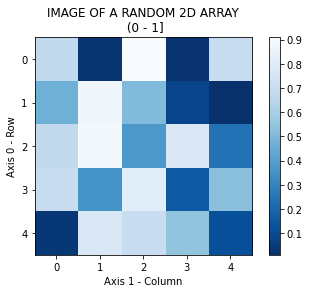

In [13]:
x1_rand = rng.random([5, 5])
print("2D Array:\n", x1_rand, "\n")
plt.imshow(x1_rand)
plt.title("IMAGE OF A RANDOM 2D ARRAY\n (0 - 1]")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
color_map = plt.imshow(x1_rand)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

RANDOM FLOATS (50 - 100]

2D Array:
 [[65.90746804 87.23321863 94.42285439 61.6892324  73.07605831]
 [93.79760279 79.7877394  66.0317229  99.7596512  76.6355082 ]
 [63.44838503 51.76590985 73.94759785 63.60548451 60.60471543]
 [76.43751558 98.15241215 57.2675555  98.31755527 83.53933044]
 [84.69494499 65.87468899 66.55685708 90.15522672 52.96047131]] 



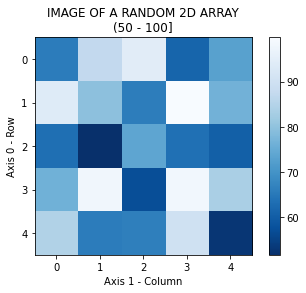

In [14]:
x2_rand = ((100-50) * rng.random((5, 5)) + 50)
print("2D Array:\n", x2_rand,"\n")
plt.imshow(x2_rand)
plt.title("IMAGE OF A RANDOM 2D ARRAY\n(50 - 100]")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
color_map = plt.imshow(x2_rand)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

ONE WITH out

***

#### [**choice**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) (a, size=None, replace=True, p=None, axis=0, shuffle=True) <a id='choice'></a>

Generates a random sample from a given array. ***a*** sets the range from which the radnom sample gets generated. If *a* is an ndarray, the output is random selection of the elements of that array. If *a* is an integer, the output is random selection of a range from 0 - given integer (exclusive). ***size*** defines the shape of the output. It is *None* by default. If *a* has more than one dimension, the size shape will be inserted into the axis dimension. ***replace*** defines if the return will have repeated elements. It is *True* by default, meaning that a value of *a* can be selected multiple times. ***p*** is the probability of the entries in *a* to be selected. By default it is *None*, meaning the probibility is equal for all - uniform distribution. ***axis*** is axis along which the selection is performed, and is *0* by default. ***shuffle*** defines if the output is shuffled when sampling without replacement. Default is *True*.

<br>

Image 1. Axis
<center><img src="https://i.stack.imgur.com/dcoE3.jpg" width="500"/></center>

##### EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS CHOSEN IN RANGE (0 - 10]

Integers: [4 1 5 ... 1 8 7] 



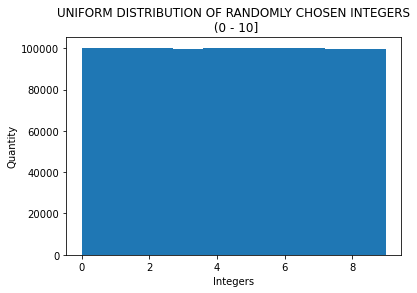

In [15]:
x_ch = (rng.choice(10,1000000))
print ("Integers:", x_ch, "\n")

plt.title("UNIFORM DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS\n (0 - 10]")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist (x_ch)
plt.show()

***

DISTRIBUTION OF RANDOM CHOSEN INTEGERS (1,3,5,7) WITH SET PROBABILITY

Integers: [3 1 3 ... 3 5 5] 



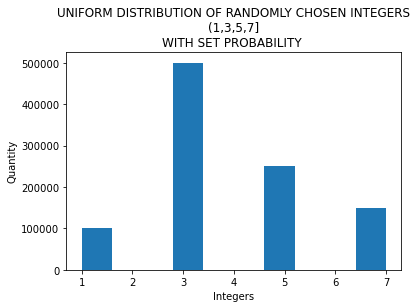

In [16]:
x1_ch = (rng.choice([1,3,5,7], 1000000, p=[0.1, 0.5, 0.25, 0.15]))
print ("Integers:", x1_ch, "\n")

plt.title("UNIFORM DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS\n(1,3,5,7]\nWITH SET PROBABILITY ")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist (x1_ch)
plt.show()

***

In [17]:
rng.choice (100)

49

***

Integers: [2 1 7 8 7 5 6 1 4 3] 



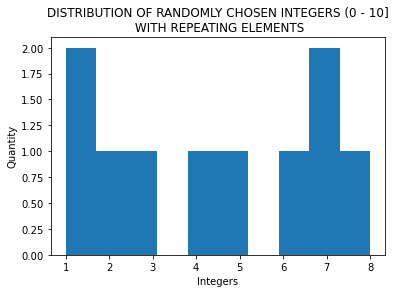

In [18]:
x2_ch = (rng.choice(10, 10))
print("Integers:", x2_ch, "\n")

plt.title("DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS (0 - 10]\n WITH REPEATING ELEMENTS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist(x2_ch)
plt.show()

***

Integers: [4 9 8 5 3 6 0 2 1 7] 



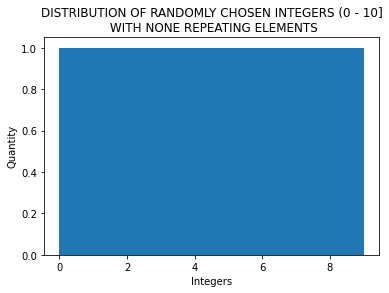

In [19]:
x3_ch = (rng.choice(10,10, replace=False))
print("Integers:", x3_ch, "\n")

plt.title("DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS (0 - 10]\n WITH NONE REPEATING ELEMENTS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist(x3_ch)
plt.show()

***

In [20]:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 4, replace=True)

array([[3, 4, 5],
       [6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

***

In [21]:
colors = ['red', 'blue', 'yellow', 'black']
rng.choice(colors, 10, p=[0.5, 0.1, 0.1, 0.3])

array(['blue', 'red', 'red', 'black', 'red', 'red', 'red', 'red', 'black',
       'red'], dtype='<U6')

***

In [22]:
rng.choice ([[1,2,3], [10,20,30], [100,200,300]],5, axis = 0)

array([[100, 200, 300],
       [ 10,  20,  30],
       [100, 200, 300],
       [ 10,  20,  30],
       [ 10,  20,  30]])

***

In [23]:
rng.choice ([[1,2,3], [10,20,30], [100,200,300]],5, axis = 1)

array([[  1,   1,   3,   1,   3],
       [ 10,  10,  30,  10,  30],
       [100, 100, 300, 100, 300]])

***

In [24]:
rng.choice (10,10, replace = False, shuffle = True)

array([6, 4, 1, 0, 3, 7, 9, 5, 8, 2], dtype=int64)

***

In [25]:
rng.choice (10,10, replace = False, shuffle = False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

***

2D Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 



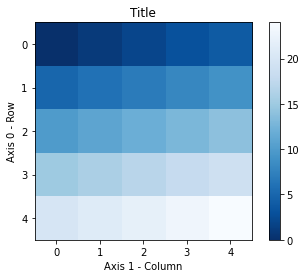

In [26]:
b = (rng.choice (25,(5,5), replace = False, shuffle = False))
print("2D Array:\n", b, "\n")
plt.title("Title")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
plt.imshow(b)
color_map = plt.imshow(b)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

2D Array:
 [[22 21  9 12  0]
 [15 18  5  3 19]
 [20 16  6 23 13]
 [10  2  4 11  1]
 [ 7 14 17 24  8]] 



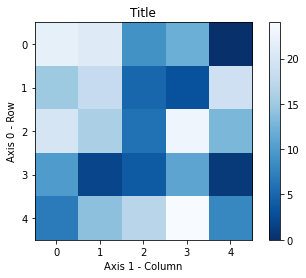

In [27]:
a = (rng.choice (25,(5,5), replace = False, shuffle = True))
print("2D Array:\n", a, "\n")
plt.title("Title")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
plt.imshow(a)
color_map = plt.imshow(a)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

#### [**bytes**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) (length) <a id='bytes'></a>

Genarates random bytes. The number of bytes is defined by ***length***.

##### EXAMPLES:
***

In [28]:
rng.bytes(1)

b'9'

***

In [29]:
rng.bytes(5)

b'(\xf9\x97`v'

***

### PERMUTATIONS

***

#### [**shuffle**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) (x, axis=0)

##### EXAMPLES:
***

[8 9 6 7 3 0 2 5 1 4]


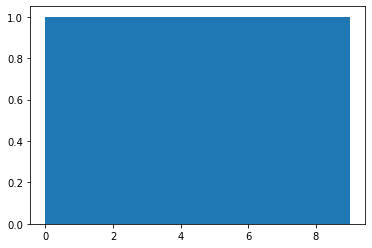

In [74]:
x_sh = np.arange(10)
rng.shuffle(x_sh)
print (x_sh)
plt.hist(x_sh)
plt.show()

***

In [126]:
x1_sh = np.arange(27).reshape((3, 3, 3))
rng.shuffle(x1_sh)
print(x1_sh)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]


***

In [134]:
x2_sh = np.arange(27).reshape((3, 3, 3))
rng.shuffle(x2_sh, axis = 1)
print(x2_sh)

[[[ 3  4  5]
  [ 0  1  2]
  [ 6  7  8]]

 [[12 13 14]
  [ 9 10 11]
  [15 16 17]]

 [[21 22 23]
  [18 19 20]
  [24 25 26]]]


***

In [148]:
x3_sh = np.arange(27).reshape((3, 3, 3))
rng.shuffle(x3_sh, axis = 2)
print(x3_sh)

[[[ 2  0  1]
  [ 5  3  4]
  [ 8  6  7]]

 [[11  9 10]
  [14 12 13]
  [17 15 16]]

 [[20 18 19]
  [23 21 22]
  [26 24 25]]]


#### [**permutation**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation) (x, axis=0) 

##### EXAMPLES:
***

In [57]:
rng.permutation(10)

array([9, 8, 1, 4, 3, 5, 0, 2, 6, 7])

***

In [58]:
rng.permutation([1, 4, 9, 12, 15])

array([ 1,  9, 12,  4, 15])

***

In [68]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr)

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

***

#### [**permuted**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted) (x, axis=None, out=None)

##### EXAMPLES:
***

In [69]:
x = np.arange(24).reshape(3, 8)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

***

In [70]:
y = rng.permuted(x, axis=1)
y

array([[ 4,  1,  5,  6,  3,  2,  7,  0],
       [12, 11, 14,  8, 15, 10, 13,  9],
       [21, 16, 23, 17, 19, 20, 18, 22]])

***

### DISTRIBUTIONS

#### Distribution 1 

#### Distribution 2

#### Distribution 3

#### Distribution 4

#### Distribution 5

### SEEDS

## CONCLUSION
***

## REFERENCES

- [1] https://towardsdatascience.com/getting-started-with-numpy-59b22df56729
- [2] https://python.plainenglish.io/what-are-basics-of-numpy-2afa9a9455cb
- [3] https://www.w3schools.com/python/numpy/numpy_intro.asp
- [4] https://www.javatpoint.com/numpy-random
- [5] https://pythonguides.com/python-numpy-random/
- [6] https://www.w3schools.com/python/numpy/numpy_random.asp
- [7] https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/

## Links to check


- https://numpy.org/doc/stable/reference/random/index.html
- https://www.w3schools.com/python/numpy/numpy_random.asp
- https://www.geeksforgeeks.org/random-sampling-in-numpy-random-function/
- https://www.javatpoint.com/numpy-random
- https://pythonguides.com/python-numpy-random/
- https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generator.html
- https://en.wikipedia.org/wiki/Discrete_uniform_distribution
- https://en.wikipedia.org/wiki/Continuous_uniform_distribution
- https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown